# RQ16 Case Narrative De-identification
Project by Aussie Frost for DSCI410L

Data provided by [CAHOOTS](https://whitebirdclinic.org/cahoots/)

Started 4/15/2024

## Preliminary imports

Note that these are all of the libraries used to run this script. You will need to install each one to ensure the script will run best.

In [1]:
# import standard data libraries
import pandas as pd
import numpy as np
import random
import regex as re
import csv

# import natural language processing libs
import spacy

# load the nlp model
nlp = spacy.load("en_core_web_sm")

# import data viz libs
import matplotlib.pyplot as plt
import seaborn as sns

## Defining random case narrative data generation script

This section defines a script that will generate 

In [2]:
def random_sentence():
    """Generate a random sentence of 25 words, including anonymized data and generic identifiers."""
    words = [
        "ambulance", "arrived", "assessed", "assisted", "at", "bathroom", "bleeding", "called", "child",
        "coherently", "combative", "complaining", "confusion", "conscious", "crisis", "de-escalate", "difficulty",
        "disoriented", "domestic", "elderly", "emergency", "entered", "evaluated", "experienced", "explained",
        "family", "female", "fever", "fire", "frantic", "hallucinations", "headache", "hospital", "house",
        "husband", "hyperventilating", "identified", "injured", "intoxicated", "irrational", "issue", "male",
        "medical", "mentally", "minor", "multiple", "neighbor", "not", "observed", "on", "pain", "paramedics",
        "patient", "person", "police", "possible", "pressure", "previously", "psychiatric", "public", "reported",
        "residence", "responding", "restrained", "responders", "room", "scene", "school", "screaming", "secured",
        "seizure", "serious", "situational", "stable", "state", "street", "suicidal", "symptoms", "threat",
        "threatening", "throat", "treatment", "transported", "trauma", "unconscious", "unresponsive", "verbal",
        "violent", "weapon", "welfare", "young"
    ]

    first_names = [
        "John", "Jane", "David", "Emily", "Michael", "Sarah", "William", "Jennifer", "Robert", "Mary-Sue"
        "Jessica", "Andrew", "Dr. Ashley", "James", "Amanda", "Sir Matthew", "Christina", "Daniel", "Elizabeth",
        "Joseph", "Nicole", "Anthony", "Margaret", "Kevin", "Laura", "Bryan", "Miss Alexis", "Nicholas", "Katherine",
        "Aiden", "Bella", "Carter", "Delilah", "Ethan", "Fiona", "Grayson", "Hazel", "Isaiah", "Juliet",
        "Kai", "Luna", "Mason", "Nora", "Oliver", "Penelope", "Quentin", "Riley", "Sebastian", "Tessa",
        "Uriah", "Violet", "Winston", "Xena", "Yosef", "Zoe", "Abram", "Beatrice", "Cedric", "Daphne",
        "Eliot", "Freya", "Gideon", "Harriet", "Idris", "Juno", "Knox", "Leia", "Milo", "Naomi",
        "Oscar", "Phoebe", "Reece", "Sienna", "Theo", "Uma", "Victor", "Willow", "Xavier", "Yasmin",
        "Zane", "Adele", "Blaine", "Cora", "Dexter", "Elsie", "Flynn", "Gracie", "Holden", "Iris",
        "Jasper", "Keira", "Levi", "Matilda", "Nolan", "Olive", "Paxton", "Quinn", "Rowan", "Scarlett",
        "Tristan", "Ursula", "Vaughn", "Whitney", "Xander", "Yara", "Zack", "Alma", "Barrett", "Celeste",
        "Drake", "Esme", "Finn", "Gemma", "Hugo", "Ivy", "Jonah", "Kyla", "Lionel", "Mira", "Nico",
        "Octavia", "Pierce", "Rosalie", "Soren", "Thalia", "Ulysses", "Verity", "Wesley", "Yvette"
    ]
    last_names = [
        "Abbott", "Black", "Chapman", "Duffy", "Ellison", "Finch", "Griffith", "Harlow", "Ingram", "Jennings",
        "Knight", "Lowe", "Maxwell", "Norris", "Osborne", "Pike", "Quinn", "Rhodes", "Sherwood", "Tate",
        "Underwood", "Vance", "Whitfield", "York", "Adler", "Barron", "Connor", "Donahue", "Easton", "Field",
        "Golden", "Hartford", "Ivy", "Joyner", "Kessler", "Lawton", "Merritt", "North", "Overton", "Pritchard",
        "Quick", "Rivers", "Sterling", "Thorne", "Upton", "Vaughn", "Waverly", "Xavier", "Youngblood", "Ziegler",
        "Archer", "Beck", "Colby", "Dalton", "Everett", "Frost", "Garrison", "Hammond", "Irvine", "Justice",
        "Kipling", "Langston", "Morrow", "Noble", "Oakley", "Parson", "Quest", "Reilly", "Sawyer", "Thrasher",
        "Ulrich", "Valentine", "Warner", "Xiong", "Yost", "Zimmerman", "Ashby", "Birch", "Crowley", "Davenport",
        "Emerson", "Forrester", "Gilmore", "Hale", "Irwin", "Jasper", "Kent", "Law", "Meadow", "Northwood",
        "O'Donnell", "Pace", "Quill", "Riddle", "Sloan", "Tanner", "Upshaw", "Vincent", "Welles", "Younger"
    ]

    # Generate a random number of names, from 1 to 3
    num_names = random.randint(1, 3)
    names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(num_names)]

    # Format the names into a natural sounding list
    if num_names > 1:
        name_text = ", ".join(names[:-1]) + " and " + names[-1]
    else:
        name_text = names[0]

    area_codes = ["212", "312", "404", "617", "703", "818", "904", "206", "303", "415"]
    phone_formats = ["({area_code})-234-1423", "{area_code}-832-1437", "+1 {area_code}-802-1437", "{area_code} 812 1497"]
    address_formats = ["123 Main St, San Francisco, CA 12345", "567 Elm St, Eugene, Ore 54321", "42 Park Way", "81915 East 24th Ave, Eugene"
                      "15161 Thornberry Lane, Eugene", "51 West 13th St, Eugene, OR 98412"]
    fax_formats = ["+1-907-555-1234"]
    zip_codes = ["97401", "04215", "24321-4215", "14512"]
    website_formats = ["www.example.com", "example.com", "http://this.net", "https://www.instagram.com/aoc"]
    ip_formats = ['.'.join(str(random.randint(0, 255)) for _ in range(4)), ':'.join('{:x}'.format(random.randint(0, 2**16 - 1)) for _ in range(8))]
    date_formats = ["2023-10-26", "12/04/2022", "August 15, 1999", "03.11.2018", "2010-02-02", "January 31", "2 Feb", "June 14", "September 22", "Mar 21st", "Apr 1"]

    sentence = " ".join(random.sample(words, random.randint(15, 45))) + f" involving {name_text}."
    phone = random.choice(phone_formats).format(area_code=random.choice(area_codes))
    address = f"{random.choice(address_formats)}, {random.choice(zip_codes)}"
    fax = random.choice(fax_formats)
    website = random.choice(website_formats)
    ip = random.choice(ip_formats)
    date = random.choice(date_formats)
    
    additional_info = f"They called 911 from {phone} on {date}. Reported at {address}. Fax: {fax}. Website: {website}. IP: {ip}."
    
    return sentence + " " + additional_info

def random_case(sentence):
    """Randomly capitalize the entire sentence or keep it as is."""
    if random.random() < 0.5:
        return sentence.upper()
    else:
        return sentence#.lower()

def generate_dataset(size):
    """ 
        Returns nothing, but creates dataset and saves to project dir.
    """
    data = []
    for i in range(size):
        date = f"2024-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}" # arbirtrary date column for multicolumn sake
        case_narrative = random_sentence()
        data.append({"date": date, "case_narrative": random_case(case_narrative)})

    # Write data to CSV file
    with open("crisis_response_calls.csv", "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=["date", "case_narrative"])
        writer.writeheader()
        writer.writerows(data)
    print("faux data CSV file generated successfully!")
    
    return

## Defining case narrative anonymizer script

For NLP, I am using spaCy and the 'en_core_web_sm' pretrained model (see more [here](https://spacy.io/models/en#en_core_web_sm)).

In [3]:
# define regex patterns
phone_pattern = r"\(?\b(\d{3})\)?[-.\s]*(\d{3})[-.\s]*(\d{4})\b"
address_pattern = r"\b\d+\s(?:[A-Za-z]+\s)*(?:St|Street|Rd|Road|Ave|Avenue|Blvd|Boulevard|Pl|Place|Lane|Ln|Drive|Dr|Court|Ct|Terrace|Ter|Way)[,.\s]"
web_pattern = r'(https?:\/\/)?(?:www\.)?[a-zA-Z0-9\.-]+\.[a-zA-Z]{2,}(?:\/\S*)?'
ip_pattern = r"\b((?:\d{1,3}\.){3}\d{1,3}|([0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|([0-9a-fA-F]{1,4}:){1,7}:|:([0-9a-fA-F]{1,4}:){1,7}|::(?:[0-9a-fA-F]{1,4}:){0,5}[0-9a-fA-F]{1,4})\b"
zip_pattern = r"\b\d{5,}\b"
date_pattern = r"\b(?:\d{1,2}(st|nd|rd|th)?\s?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)|\d{1,2}/\d{1,2}/?\d{2,4}|\d{4}-\d{2}-\d{2})\b"
num_pattern = r"\b\w*[\d]+\w*\b"

"""
# DELETE THESE THINGS
# Access the entity recognizer component
ner = nlp.get_pipe("ner")

# Print all unique entity labels
entity_labels = ner.labels
print(entity_labels)
# DELETE THESE THINGS
"""
    
def nlp_anonymize_text(text, name_rem, address_rem, date_rem):
    """ nlp_anonymize_text(text)
    
    - this function deploys a spacy NLP model and removes
    target features that are found that are found
    """
    
    # TODO use matcher to make better removals of names
    
    # create default and title cased texts to use
    text_default = text
    text_titled = text.title()
    
    for text in [text_default, text_titled]:

        # process the text with the NLP model
        doc = nlp(text)

        # replace all recognized names with 'NAME_REMOVED'
        for ent in doc.ents:
            
            # first check for addresses
            if ent.label_ in ["GPE", "LOC", "FAC"]:
                text = text.replace(ent.text, "ADDRESS_REMOVED")
                address_rem += 1
            # then check for names
            if ent.label_ == "PERSON":
                text = text.replace(ent.text, "NAME_REMOVED")
                name_rem += 1
            # then check for dates
            if ent.label_ == "DATE":
                text = text.replace(ent.text, "DATE_REMOVED")
                date_rem += 1
            
    return text, name_rem, address_rem, date_rem

# define data_anonymizer
def data_anonomizer(case):
    """ narrative_anonymizer(case)
    
    this function takes in a dataset, in this case a case narrative
    and returns an anonymized case, where any identifying information
    is replaced with a X_REMOVED, where X is representative
    of the type of information that was removed.
    """
    
    # initialize removal counters
    name_rem = phone_rem = web_rem = address_rem = address_rem_ = ip_rem = zip_rem = date_rem = date_rem_ = 0
    
    # use NLP to anonomize target features
    case, name_rem, address_rem, date_rem = nlp_anonymize_text(case, name_rem, address_rem, date_rem)
    
    # apply RegEx pattern for target features
    case, phone_rem = re.subn(phone_pattern, "PHONE_REMOVED", case)
    case, web_rem = re.subn(web_pattern, "WEB_REMOVED", case)
    case, ip_rem = re.subn(ip_pattern, "IP_REMOVED", case)
    case, zip_rem = re.subn(zip_pattern, "ZIP_REMOVED", case)
    case, address_rem_ = re.subn(address_pattern, "ADDRESS_REMOVED", case)
    case, date_rem_ = re.subn(date_pattern, "DATE_REMOVED", case)
    
    # combine address and date results
    address_rem += address_rem_
    date_rem += date_rem_
    
    # optional: remove any strings containing numbers
    case, num_rem = re.subn(num_pattern, "NUM_REMOVED", case)
    
    # additional cleaning: remove symbols (except hyphens, periods, commas)
    # ????
    
    """ EASILY LOOK AT RESULTS
    pattern = r'\b\w*REMOVED\w*\b'
    
    # Replace matched strings with an empty string
    case = re.sub(pattern, '', case)
    """
        
    return {
        "case_narrative": case,
        "name_removed": name_rem,
        "phone_removed": phone_rem,
        "address_removed": address_rem,
        "web_removed": web_rem,
        "ip_removed": ip_rem,
        "zip_removed": zip_rem,
        "date_removed": date_rem,
        "num_removed": num_rem
        }

def anonymize_narratives(datapath):
    """ 
    This function takes a data path, then deploys our data anonomyzer
    on the case narrative dataset, strips target features and stores 
    cleaned case narratives alongside metrics of how many
    features were removed in an anonymized data csv.
    """
    
    # read data into pd dataframe
    data = pd.read_csv(datapath)
    
    # apply data_anonomizer and get resulting columns as list
    print("anonymizer script running!")
    anonymized = data["case_narrative"].apply(data_anonomizer).to_list()
    print("anonymizer script deployed!")

    # create our anonymized data
    anonymized_data = pd.DataFrame(anonymized)

    # write data to csv
    anonymized_data.to_csv("crisis_response_calls_anonomized.csv", index=False)
    print("anonymized csv created!")
    
    return

## Generating a test dataset and deploying case anonymizer

In [4]:
# generate a faux dataset
generate_dataset(500)

# anonymize the narratives
anonymize_narratives("crisis_response_calls.csv")

faux data CSV file generated successfully!
anonymizer script running!
anonymizer script deployed!
anonymized csv created!


## Validate our results

Amount of Features Removed:
 name_removed       493
phone_removed      500
address_removed    366
web_removed        500
ip_removed         489
zip_removed         23
date_removed       500
num_removed        500
dtype: int64


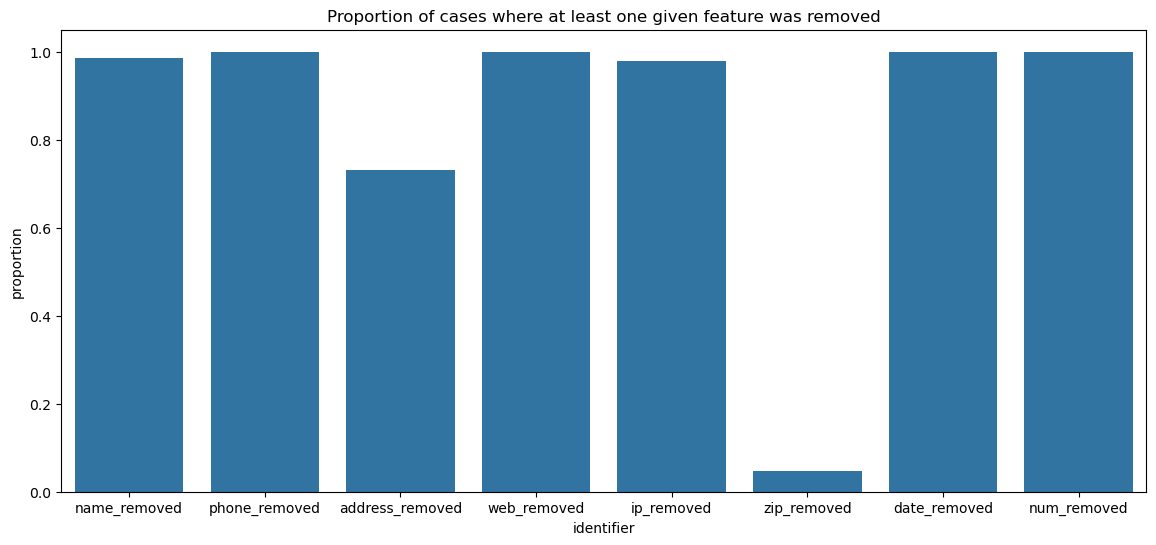

In [5]:
# load in our anonymized data
anonymized_data = pd.read_csv("crisis_response_calls_anonomized.csv")

# first, assess narratives where at least one name was not removed
anonymized_results = anonymized_data.drop(columns=["case_narrative"])
anonymized_results

amt_features_removed = anonymized_results.apply(lambda x: (x != 0).sum()) ## change this clause x > 1
non_zero_prop = amt_features_removed/len(anonymized_results)
print("Amount of Features Removed:\n", amt_features_removed)

plt.figure(figsize=(14,6))
sns.barplot(non_zero_prop)
plt.title("Proportion of cases where at least one given feature was removed")
plt.ylabel('proportion')
plt.xlabel('identifier')
plt.show()

In [6]:
anonymized_data[anonymized_data["name_removed"] > 1].shape[0]

481

In [7]:
anonymized_data[anonymized_data["name_removed"] == 0]

,case_narrative,name_removed,phone_removed,address_removed,web_removed,ip_removed,zip_removed,date_removed,num_removed
25,Called Male Difficulty Hospital Weapon Minor E...,0,2,2,1,1,0,4,2
156,Person Threatening Arrived Restrained Neighbor...,0,2,1,1,1,0,4,2
197,Bleeding Public Frantic Reported State Fire St...,0,2,1,1,1,0,4,2
243,Young Crisis Child Entered Observed Serious Fe...,0,1,1,1,1,0,6,3
349,Fire Secured House Conscious Family Arrived Fe...,0,2,2,1,1,0,4,2
385,Secured Weapon Multiple House Symptoms Hospita...,0,2,1,1,1,0,4,3
480,Child Hyperventilating Responding Entered Scho...,0,2,2,1,1,0,4,2
